In [1]:
from math import inf
import networkx as nx
import matplotlib.pyplot as plt
import random
import networkx as nx
%matplotlib inline

In [2]:
class Vertex:
    
    def __init__(self,id):
        self.attributes = {}
        self.attributes['id'] = id
        
    def __str__(self):
        return str(self.attributes)
        
    def new_copy(self):
        return Vertex(self.attributes['id'])
        
    def set(self,key,value):
        self.attributes[key] = value
        
    def get(self,key):
        return self.attributes[key]

In [3]:
class Graph:

    def __init__(self):
        self.vertices = {}
        self.id_to_v = {}
        self.edge_attributes = {}
    
    def __str__(self):
        s = ''
        for v in self.vertices:
            s += str(v)
            s += '\n\n'
        return s
    
    def add_vertex(self,v):
        self.vertices[v] = []
        self.id_to_v[v.get('id')] = v
    
    def size_vertices(self):
        return len(self.vertices)
    
    def add_edge(self,v1,v2, s):
        pass
    
    def adjacent(self,v):
        return self.vertices[v]

In [4]:

class DirectedGraph(Graph):
        
    def add_edge(self,v1,v2, s, p):
        self.vertices[v1].append(v2)
        self.edge_attributes[(v1,v2)] = {}
        self.edge_attributes[(v1,v2)]['sound'] = s 
        self.edge_attributes[(v1,v2)]['probability'] = p
    
    def mostProbable(self, v0, sequence): 
        table = [[0 for x in range(len(sequence))] for x in range(len(self.vertices))]

        for l in self.adjacent(v0):
            print(self.edge_attributes[(v0,l)]['sound'])
            if self.edge_attributes[(v0,l)]['sound'] == sequence[0]: 
                
                table[int(l.get('id'))][0] = float(self.edge_attributes[(v0,l)]['probability'])
                
        i = 1 
        
        for s in sequence[1:]:
            starting_vertices = [x for x in self.vertices if table[int(x.get('id'))][i-1] != 0]
     
                
            for v in self.vertices:
                max_q = 0 
                for vertex in starting_vertices:
                    adjacent = [x for x in self.adjacent(vertex) if self.edge_attributes[(vertex,x)]['sound'] == s]
                    
                        
                    for x in adjacent:
                        
                       
                        q = table[int(vertex.get('id'))][i-1] * float(self.edge_attributes[(vertex, x)]['probability'])
                        
                        
                        if q > max_q:
                            max_q = q 
                            table[int(x.get('id'))][i] = max_q
                            
                        if table[int(x.get('id'))][i] == 0:
                            table[int(x.get('id'))][i] = q
                            
            #print(table)
            i += 1 
        print(table)

In [5]:
def drawGraph(g):
    pos = nx.circular_layout(g)
 
    edge_labels = { (v1,v2): s['sound'] for v1,v2,s in g.edges(data=True) }

    nx.draw_networkx_nodes(g,pos,node_size=700)
    nx.draw_networkx_edges(g,pos)
    nx.draw_networkx_labels(g,pos)
    nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)

    plt.title("Graph Illustration")
    plt.axis('off')
    plt.show()

added edge  b  from  0  to  5  with prob  0.1523883915594565
added edge  b  from  0  to  11  with prob  0.03471106635848964
added edge  a  from  0  to  17  with prob  0.0023571831716645564
added edge  c  from  0  to  10  with prob  0.19067831035228444
added edge  a  from  0  to  6  with prob  0.03418973519224677
added edge  d  from  0  to  9  with prob  0.014073631314810098
added edge  b  from  0  to  12  with prob  0.04099410659942693
added edge  b  from  0  to  8  with prob  0.1994228178771067
added edge  d  from  0  to  1  with prob  0.013517291256536446
added edge  b  from  0  to  20  with prob  0.016579570273806965
added edge  a  from  0  to  14  with prob  0.0004052267865705117
added edge  c  from  0  to  13  with prob  0.08537919307963338
added edge  c  from  0  to  2  with prob  0.006126741832200855
added edge  a  from  5  to  4  with prob  0.025892222508894225
added edge  a  from  5  to  7  with prob  0.06480531064921902
added edge  d  from  5  to  3  with prob  0.017988857005

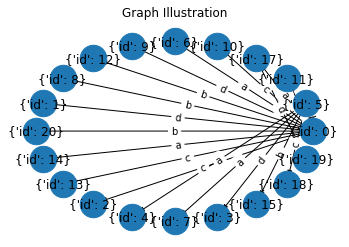

In [6]:
import random 


def testMethod():
    
    G = DirectedGraph()
    g = nx.DiGraph()
    
    sigmaOptions = ['a','b','c','d']
    #vertexOptions = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
    vertexUsed = []
    vertexEdgeAdded = []
    
    #add a random number of the vertices .. i capped at 30 but can cap at any number
    numVertices = random.randint(2,30)
    for i in range(numVertices): 
                
        G.add_vertex(Vertex(i))
        vertexUsed.append(Vertex(i).attributes['id'])
                
    #This will be the number of edges coming out of the starting vertex 
    numEdges = random.randint(2,len(vertexUsed)-1)
    #This gets the probabilities for each of the edges 
    values = [0.0, 1.0] + [random.random() for _ in range(numEdges - 1)]
    values.sort()
    probabilities = [values[i+1] - values[i] for i in range(numEdges)]
    
    #add edges to the starting vertex 
    for v in G.vertices: 
        v0 = v
        break
        
    vertexUsed.remove(v0.attributes['id'])
    
    for i in range(numEdges-1): 
        
        v1 = random.choice(vertexUsed)
        #don't want duplicate edges
        vertexUsed.remove(v1)
        #print(vertexUsed)
        v1 = G.id_to_v[v1]
        #record ending vertex so can add subsequent edges to it in later loop 
        vertexEdgeAdded.append(v1)
        sigma = random.choice(sigmaOptions)
        
        G.add_edge(v0, v1, sigma, probabilities[i])
        print('added edge ', sigma, ' from ', v0.attributes['id'], ' to ',v1.attributes['id'], ' with prob ', probabilities[i])
        g.add_edge(v0, v1, sound=sigma)
        
    #keep adding edges until there is only one or less vertex remaining in the list 
    while len(vertexUsed) > 1: 
                        
        #this iterates through the list of potential starting vertices
        for v in vertexEdgeAdded:
            
            #set the number of edges to a max of the length of the remaining vertices 
            numEdges = random.randint(0,len(vertexUsed)-1)
            
            values = [0.0, 1.0] + [random.random() for _ in range(numEdges - 1)]
            values.sort()
            probabilities = [values[i+1] - values[i] for i in range(numEdges)]
            
            vertexEdgeAdded.remove(v)
            
            for i in range(0,numEdges):
                
                v1 = v
                #chooses from one of the vertices 
                v2 = random.choice(vertexUsed)
                vertexUsed.remove(v2)
                v2 = G.id_to_v[v2]
                vertexEdgeAdded.append(v2)
                sigma = random.choice(sigmaOptions)
                
                G.add_edge(v1, v2, sigma, probabilities[i])
                print('added edge ', sigma, ' from ', v1.attributes['id'], ' to ', v2.attributes['id'], ' with prob ', probabilities[i])
                g.add_edge(v1, v2, sound=sigma)
                
  
    drawGraph(g)
    return G

    
graph = testMethod()
    

added edge  d  from  0  to  13  with prob  0.3946814220692386
added edge  a  from  13  to  25  with prob  0.20020650137796248
added edge  c  from  13  to  24  with prob  0.33483655715315086
added edge  c  from  13  to  12  with prob  0.46495694146888666
added edge  c  from  24  to  10  with prob  0.052168540718632306
added edge  d  from  24  to  2  with prob  0.037931087171870104
added edge  d  from  24  to  20  with prob  0.029724427302761036
added edge  d  from  24  to  9  with prob  0.03033864401734232
added edge  b  from  24  to  22  with prob  0.01621962595933779
added edge  c  from  24  to  17  with prob  0.11873132700062428
added edge  d  from  24  to  4  with prob  0.12478200583578514
added edge  a  from  24  to  16  with prob  0.04917673462384187
added edge  d  from  24  to  23  with prob  0.06557506894100151
added edge  d  from  24  to  26  with prob  0.04492853684518172
added edge  c  from  24  to  5  with prob  0.015218821309697428
added edge  a  from  24  to  7  with prob 

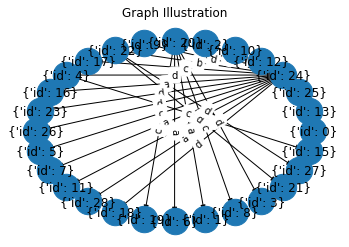

d
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [7]:
G5 = testMethod()
for v in G5.vertices: 
    v0 = v
    break

G5.mostProbable(v0,'abb')